In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits.mplot3d import Axes3D


In [5]:
df=pd.read_csv('Mall_Customers.csv.xls')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
data=df.drop('Gender',axis=1)
data.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,2,21,15,81
2,3,20,16,6
3,4,23,16,77
4,5,31,17,40


In [8]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


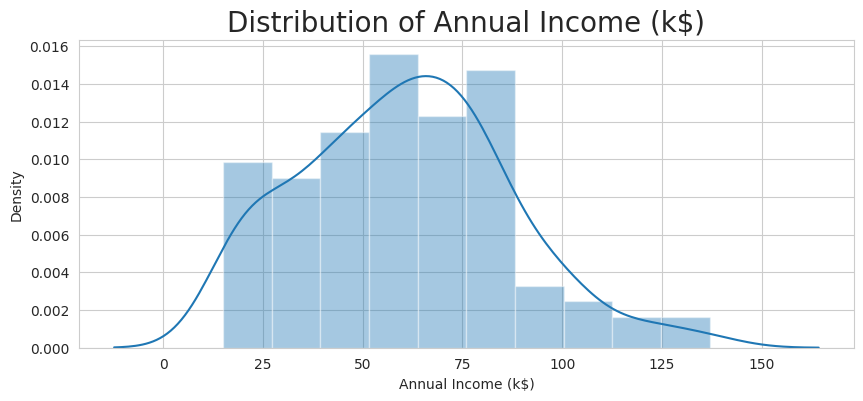

In [9]:
#distribution of annual income
plt.figure(figsize=(10,4))
sns.set_style('whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)',fontsize=20)
plt.xlabel=('Annual Income (k$)')
plt.ylabel=('Count')

TypeError: 'str' object is not callable

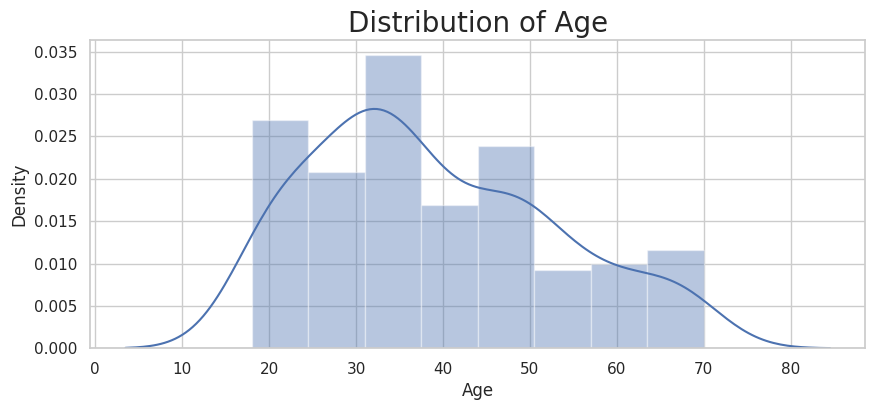

In [10]:
#Distribution of age
plt.figure(figsize=(10, 4))
sns.set(style = 'whitegrid')
sns.distplot(df['Age'])
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')

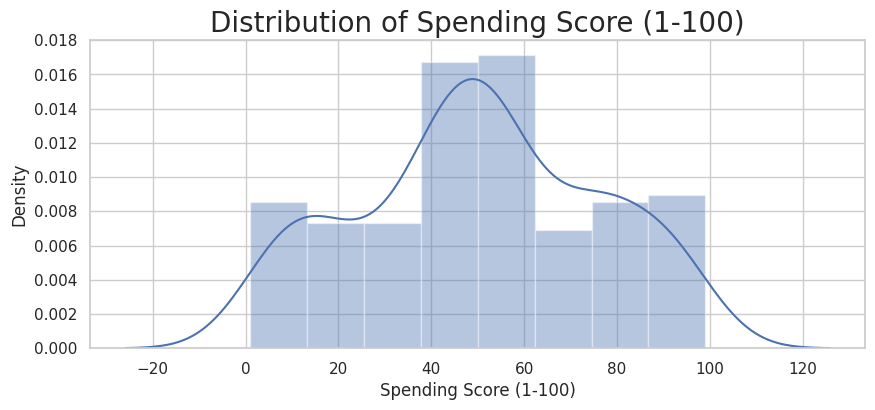

In [11]:
#Distribution of spending score
plt.figure(figsize=(10, 4))
sns.set(style = 'whitegrid')
sns.distplot(data['Spending Score (1-100)'])
plt.title('Distribution of Spending Score (1-100)', fontsize = 20)
plt.xlabel='Spending Score (1-100)'

<Axes: xlabel='Gender', ylabel='count'>

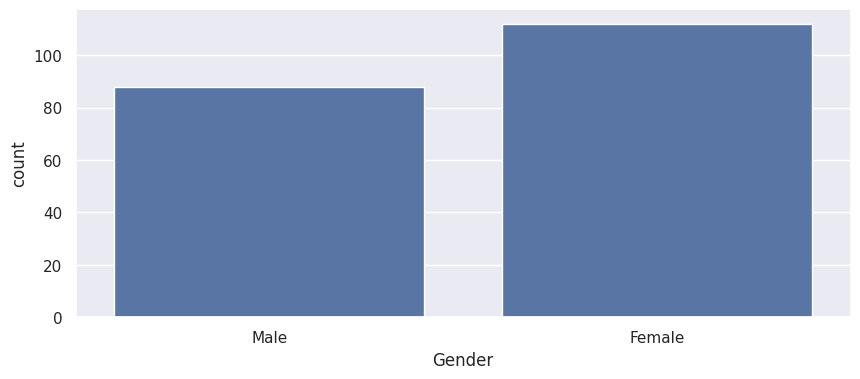

In [12]:
plt.figure(figsize=(10,4))
sns.set_style('darkgrid')
sns.countplot(x='Gender',data=df,)

<Axes: >

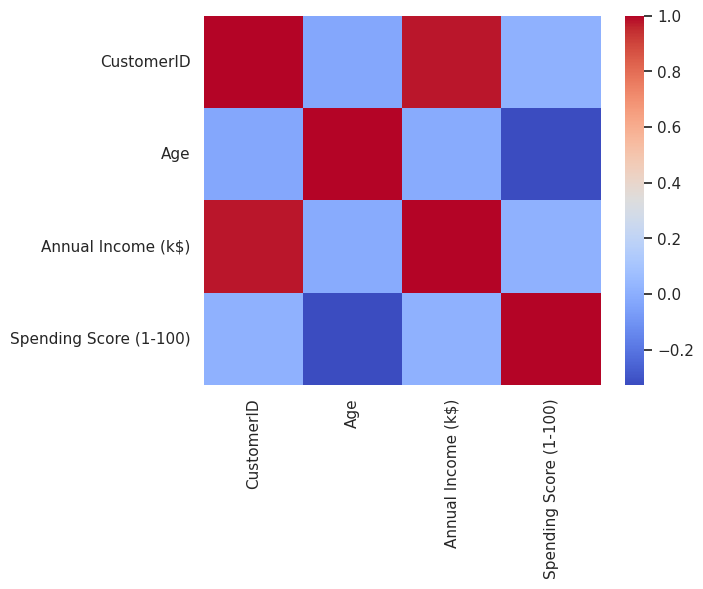

In [13]:
sns.heatmap(data.corr(),cmap='coolwarm')

Text(0.5, 1.0, 'Spending Score (1-100) vs Annual Income (k$)')

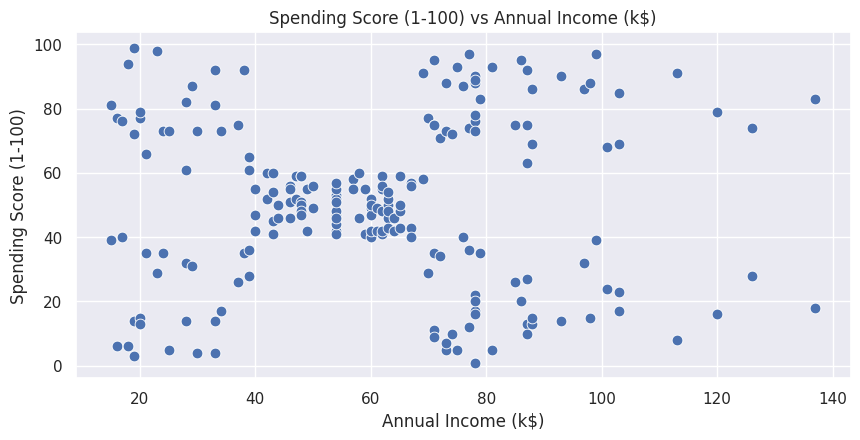

In [14]:
#Scatterplot of the input data
plt.figure(figsize=(10,4.5))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',  data = df ,s = 60 )
plt.xlabel='Annual Income (k$)'
plt.ylabel='Spending Score (1-100)'
plt.title('Spending Score (1-100) vs Annual Income (k$)')

In [15]:

df1=df[["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]
X=df1[["Annual Income (k$)","Spending Score (1-100)"]]

In [16]:
#Importing KMeans from sklearn
from sklearn.cluster import KMeans

In [17]:
wcss=[]
for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

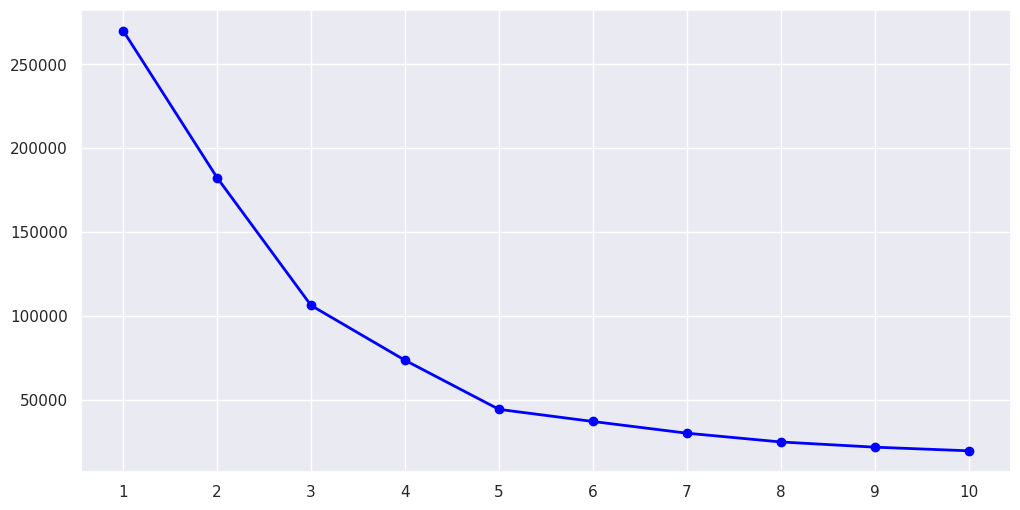

In [18]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="blue", marker ="o")
plt.xlabel=='k value'
plt.xticks(np.arange(1,11,1))
plt.ylabel='wcss()'

In [19]:
#Taking 5 clusters
km1=KMeans(n_clusters=5)
#Fitting the input data
km1.fit(X)
#predicting the labels of the input data
y=km1.predict(X)
#adding the labels to a column named label
df1["label"] = y
#The new dataframe with the clustering done
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


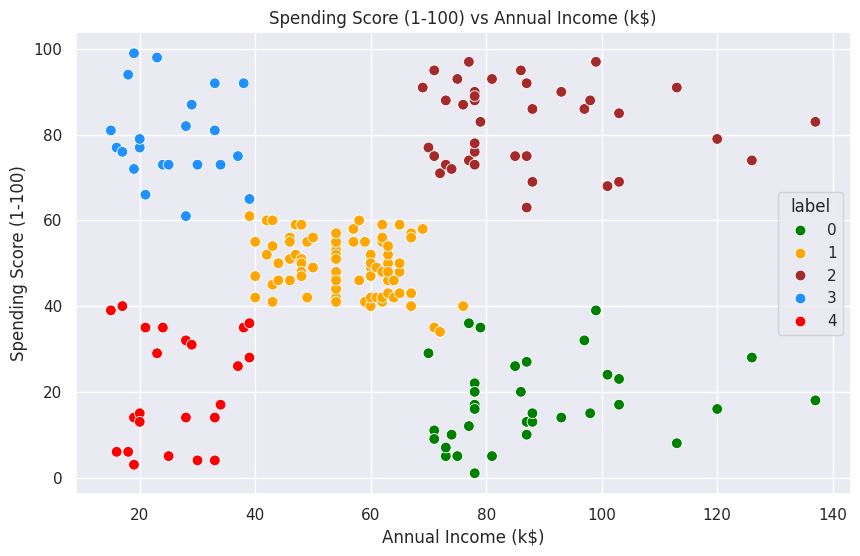

In [20]:
#Scatterplot of the clusters
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Annual Income (k$)',y = 'Spending Score (1-100)',hue="label",
                 palette=['green','orange','brown','dodgerblue','red'], legend='full',data = df1  ,s = 60 )
plt.xlabel='Annual Income (k$)'
plt.ylabel='Spending Score (1-100)'
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

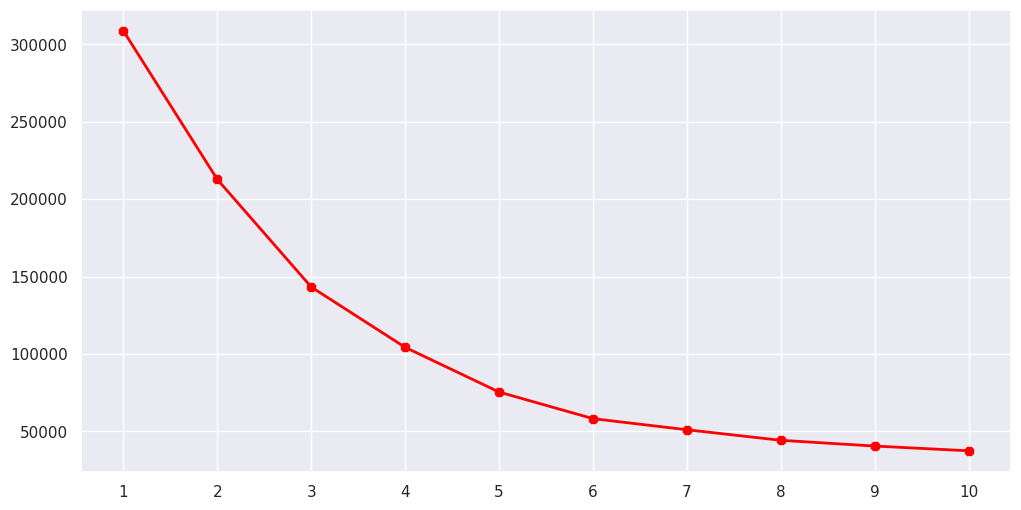

In [21]:
#Taking the features
X2=df1[["Age","Annual Income (k$)","Spending Score (1-100)"]]
#Now we calculate the Within Cluster Sum of Squared Errors (WSS) for different values of k.
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel="K Value"
plt.xticks(np.arange(1,11,1))
plt.ylabel="WCSS"

In [22]:
#We choose the k for which WSS starts to diminish
km2 = KMeans(n_clusters=5)
y2 = km.fit_predict(X2)
df1["label"] = y2
#The data with labels
df1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,1,Male,19,15,39,6
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,6


In [25]:
cust1=df1[df1["label"]==1]
print('Number of customer in 1st group=', len(cust1))
print('They are -', cust1["CustomerID"].values)
print("--------------------------------")
cust2=df1[df1["label"]==2]
print('Number of customer in 2nd group=', len(cust2))
print('They are -', cust2["CustomerID"].values)
print("--------------------------------")
cust3=df1[df1["label"]==0]
print('Number of customer in 3rd group=', len(cust3))
print('They are -', cust3["CustomerID"].values)
print("--------------------------------")
cust4=df1[df1["label"]==3]
print('Number of customer in 4th group=', len(cust4))
print('They are -', cust4["CustomerID"].values)
print("-------------------------------")
cust5=df1[df1["label"]==4]
print('Number of customer in 5th group=', len(cust5))
print('They are -', cust5["CustomerID"].values)
print("------------------------------")

Number of customer in 1st group= 24
They are - [ 67  72  77  78  80  84  86  90  93  94  97  99 102 105 108 113 118 119
 120 122 123 127 147 161]
--------------------------------
Number of customer in 2nd group= 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
--------------------------------
Number of customer in 3rd group= 11
They are - [179 181 183 185 187 189 191 193 195 197 199]
--------------------------------
Number of customer in 4th group= 11
They are - [180 182 184 186 188 190 192 194 196 198 200]
-------------------------------
Number of customer in 5th group= 12
They are - [ 3  7  9 11 13 15 23 25 31 33 35 37]
------------------------------
